<H3> Init </H3>

In [5]:
%reload_ext autoreload
%autoreload 2
#ignore warnings.
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

<H3> Imports</H3>

In [6]:
#imports
import pandas as pd
import os, sys
import importlib
import yaml
from pathlib import Path

#path append
sys.path.append(os.path.join(Path.cwd(), 'modules'))
import Evaluate, Helper, Present, Score, Synthetic


<H3> File Configurations </H3>
<p> Just edit the configuration file path/address. And inside the config.yaml file in 'config' folder, you can edit prediection, referral and result file addresses.</p>

In [7]:
#main
def load_configurations():
    config_file = 'config/config.yaml'
    with open(config_file) as f:
        config = yaml.safe_load(f)
        c_gen = config['c_gen']
        c_p = config['c_p']
        c_r = config['c_r']
        c_e = config['c_e']
        c_visual = config['c_visual']
        
        #preprocessing
        c_e['eval_date'] = pd.to_datetime(c_e['eval_date'])
    
    return c_gen, c_p, c_r, c_e, c_visual

<H2> MAIN </H2>
<p> The entry point. </p>

,Experiment Name,Model,Window,Eval Date,Num Samples,TN_@k=50,FP_@k=50,FN_@k=50,TP_@k=50,precision_@k=50,recall_@k=50,accuracy_@k=50,balanced_acc_@k=50,f1_score_@k=50,log_loss_@k=50,roc_auc_score_@k=50,brier_score_loss_@k=50,Prediction Source,Referral Source,Result Output,Start Time,End Time,Total Time
0,Version 3.0,lin_reg,2016/10-2017/07,2017-01-01,495,442.00000,49.00000,3.00000,1.00000,0.02000,0.25000,0.25000,0.57510,0.03704,0.98694,0.52749,0.32991,./data/predictions/predictions.csv,./data/referrals/referrals.csv,./results/results.csv,2020-05-27 12:41:18.346615-04:00,2020-05-27 12:41:18.367558-04:00,00:00:00.020943
1,Version 3.0,lin_reg,2017/01-2017/04,2017-01-01,495,442.00000,49.00000,3.00000,1.00000,0.02000,0.25000,0.25000,0.57510,0.03704,0.98694,0.52749,0.32991,./data/predictions/predictions.csv,./data/referrals/referrals.csv,./results/results.csv,2020-05-27 12:41:18.370551-04:00,2020-05-27 12:41:18.377532-04:00,00:00:00.006981
2,Version 3.0,lin_reg,2017/01-2017/07,2017-01-01,495,442.00000,49.00000,3.00000,1.00000,0.02000,0.25000,0.25000,0.57510,0.03704,0.98694,0.52749,0.32991,./data/predictions/predictions.csv,./data/referrals/referrals.csv,./results/results.csv,2020-05-27 12:41:18.377532-04:00,2020-05-27 12:41:18.384513-04:00,00:00:00.006981
3,Version 3.0,lin_reg,2017/01-2018/01,2017-01-01,495,439.00000,49.00000,6.00000,1.00000,0.02000,0.14286,0.14286,0.52122,0.03509,0.98211,0.59456,0.32780,./data/predictions/predictions.csv,./data/referrals/referrals.csv,./results/results.csv,2020-05-27 12:41:18.384513-04:00,2020-05-27 12:41:18.392492-04:00,00:00:00.007979
4,Version 3.0,rand_forest,2016/10-2017/07,2017-01-01,495,443.00000,48.00000,2.00000,2.00000,0.04000,0.50000,0.50000,0.70112,0.07407,0.98813,0.64358,0.32953,./data/predictions/predictions.csv,./data/referrals/referrals.csv,./results/results.csv,2020-05-27 12:41:18.393489-04:00,2020-05-27 12:41:18.400470-04:00,00:00:00.006981
5,Version 3.0,rand_forest,2017/01-2017/04,2017-01-01,495,443.00000,48.00000,2.00000,2.00000,0.04000,0.50000,0.50000,0.70112,0.07407,0.98813,0.64358,0.32953,./data/predictions/predictions.csv,./data/referrals/referrals.csv,./results/results.csv,2020-05-27 12:41:18.401468-04:00,2020-05-27 12:41:18.408449-04:00,00:00:00.006981
6,Version 3.0,rand_forest,2017/01-2017/07,2017-01-01,495,443.00000,48.00000,2.00000,2.00000,0.04000,0.50000,0.50000,0.70112,0.07407,0.98813,0.64358,0.32953,./data/predictions/predictions.csv,./data/referrals/referrals.csv,./results/results.csv,2020-05-27 12:41:18.409446-04:00,2020-05-27 12:41:18.415444-04:00,00:00:00.005998
7,Version 3.0,rand_forest,2017/01-2018/01,2017-01-01,495,440.00000,48.00000,5.00000,2.00000,0.04000,0.28571,0.28571,0.59368,0.07018,0.98659,0.61300,0.32879,./data/predictions/predictions.csv,./data/referrals/referrals.csv,./results/results.csv,2020-05-27 12:41:18.416429-04:00,2020-05-27 12:41:18.423409-04:00,00:00:00.006980
8,Version 3.0,xg_boost,2016/10-2017/07,2017-01-01,495,441.00000,50.00000,4.00000,0.00000,0.00000,0.00000,0.00000,0.44908,0.00000,1.04143,0.31976,0.34027,./data/predictions/predictions.csv,./data/referrals/referrals.csv,./results/results.csv,2020-05-27 12:41:18.424407-04:00,2020-05-27 12:41:18.432385-04:00,00:00:00.007978
9,Version 3.0,xg_boost,2017/01-2017/04,2017-01-01,495,441.00000,50.00000,4.00000,0.00000,0.00000,0.00000,0.00000,0.44908,0.00000,1.04143,0.31976,0.34027,./data/predictions/predictions.csv,./data/referrals/referrals.csv,./results/results.csv,2020-05-27 12:41:18.433382-04:00,2020-05-27 12:41:18.441361-04:00,00:00:00.007979


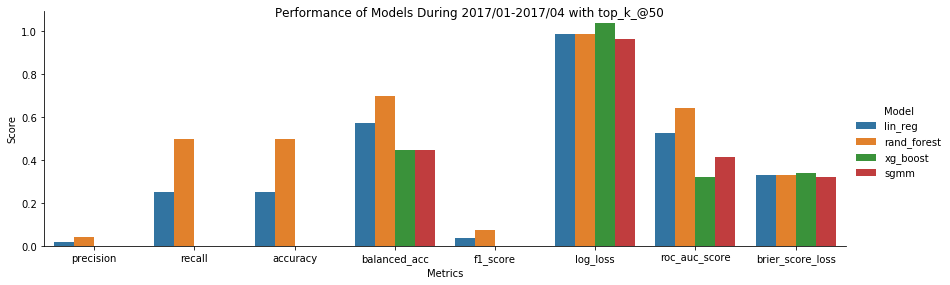

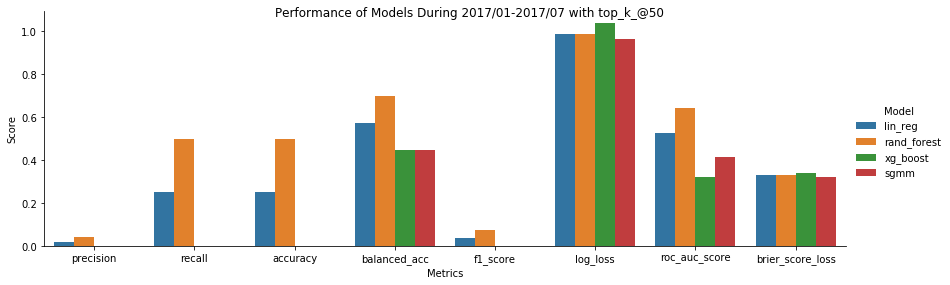

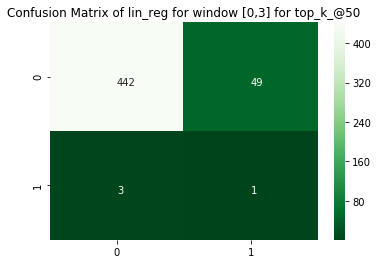

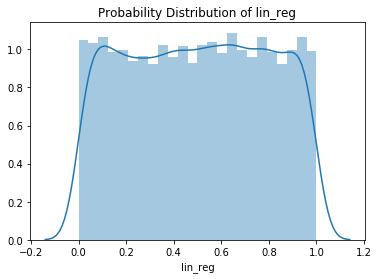

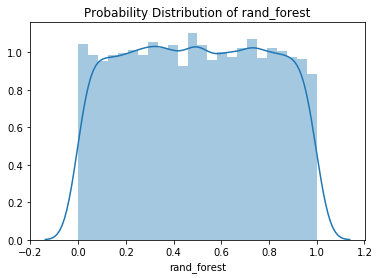

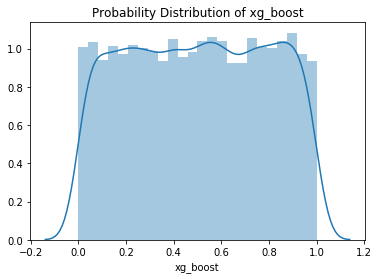

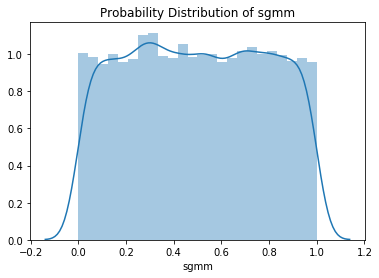

In [8]:
importlib.reload(Evaluate)
importlib.reload(Helper)
importlib.reload(Present)
importlib.reload(Score)
importlib.reload(Synthetic)

if __name__ == "__main__":
    c_gen, c_p, c_r, c_e, c_visual = load_configurations()
    Synthetic.generate_synthetic_ground_truth_data(c_gen, c_r, c_e) #uncomment if you want to generate synthetic data
    Synthetic.generate_synthetic_prediction_data(c_gen, c_p, c_e)   #uncomment if you want to generate synthetic data
    all_model_evaluations = Evaluate.evaluate(c_p, c_r, c_e) 
    Present.present_evaluation(c_p, c_r, c_e, c_visual, all_model_evaluations)
    